# Example 10: Relativitistic Velocity Addition

In this example, we will symbolically regress $f(u,v)=\frac{u+v}{1+uv}$. In relavitity, we know the rapidity trick $f(u,v)={\rm tanh}({\rm arctanh}\ u+{\rm arctanh}\ v)$. Can we rediscover rapidity trick with KAN?

Intialize model and create dataset

In [12]:
from kan import *

# initialize KAN with G=3
model = KAN(width=[2,1,1], grid=10, k=3)

# create dataset
f = lambda x: (x[:,[0]]+x[:,[1]])/(1+x[:,[0]]*x[:,[1]])
dataset = create_dataset(f, n_var=2, ranges=[-0.9,0.9])

checkpoint directory created: ./model
saving model version 0.0


Train KAN and plot

In [13]:
model.fit(dataset, opt="LBFGS", steps=20);

| train_loss: 9.06e-04 | test_loss: 9.09e-04 | reg: 6.62e+00 | : 100%|█| 20/20 [00:02<00:00,  7.45it

saving model version 0.1


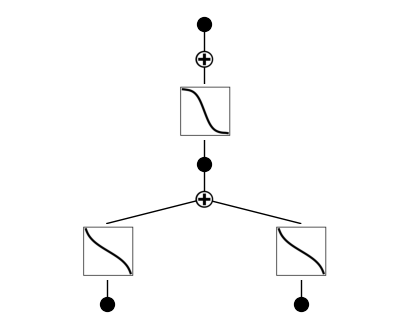

In [14]:
model.plot(beta=10)

Retrain the model, the loss remains similar, meaning that the locking does not degrade model behavior, justifying our hypothesis that these two activation functions are the same. Let's now determine what this function is using $\texttt{suggest_symbolic}$

In [15]:
model.suggest_symbolic(0,1,0,weight_simple=0.0)

  function  fitting r2    r2 loss  complexity  complexity loss  total loss
0  arctanh    0.999999 -16.478226           4                4  -16.478226
1      tan    0.999841 -12.526917           3                3  -12.526917
2   arcsin    0.998865  -9.770447           4                4   -9.770447
3   arccos    0.998865  -9.770447           4                4   -9.770447
4    x^0.5    0.982241  -5.814472           2                2   -5.814472


('arctanh',
 (<function kan.utils.<lambda>(x)>,
  <function kan.utils.<lambda>(x)>,
  4,
  <function kan.utils.<lambda>(x, y_th)>),
 0.9999990463256836,
 4)

We can see that ${\rm arctanh}$ is at the top of the suggestion list! So we can set both to arctanh, retrain the model, and plot it.

In [16]:
model.fix_symbolic(0,0,0,'arctanh')
model.fix_symbolic(0,1,0,'arctanh')

r2 is 0.9999994039535522
saving model version 0.2
r2 is 0.9999990463256836
saving model version 0.3


tensor(1.0000)

In [17]:
model.fit(dataset, opt="LBFGS", steps=20, update_grid=False);

| train_loss: 7.43e-04 | test_loss: 7.97e-04 | reg: 5.39e+00 | : 100%|█| 20/20 [00:02<00:00,  6.78it

saving model version 0.4


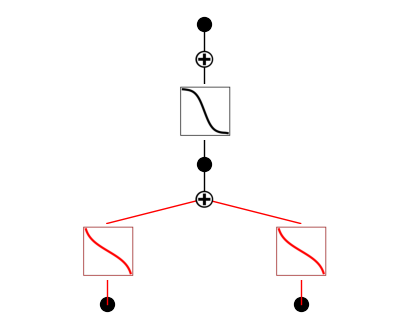

In [18]:
model.plot(beta=10)

We will see that ${\rm tanh}$ is at the top of the suggestion list! So we can set it to ${\rm tanh}$, retrain the model to machine precision, plot it and finally get the symbolic formula.

In [19]:
model.suggest_symbolic(1,0,0,weight_simple=0.)

   function  fitting r2   r2 loss  complexity  complexity loss  total loss
0  gaussian    0.990241 -6.677572           3                3   -6.677572
1      tanh    0.974454 -5.290217           3                3   -5.290217
2    arctan    0.971844 -5.149921           4                4   -5.149921
3       cos    0.966063 -4.880588           2                2   -4.880588
4       sin    0.966063 -4.880560           2                2   -4.880560


('gaussian',
 (<function kan.utils.<lambda>(x)>,
  <function kan.utils.<lambda>(x)>,
  3,
  <function kan.utils.<lambda>(x, y_th)>),
 0.9902409911155701,
 3)

In [20]:
model.fix_symbolic(1,0,0,'tanh')

Best value at boundary.
r2 is 0.974454402923584
saving model version 0.5


tensor(0.9745)

In [23]:
model.fit(dataset, opt="Adam", lr=1e-3, steps=2000, update_grid=False, singularity_avoiding=True);

| train_loss: 5.23e-07 | test_loss: 5.28e-07 | reg: 0.00e+00 | : 100%|█| 2000/2000 [00:25<00:00, 79.


saving model version 0.7


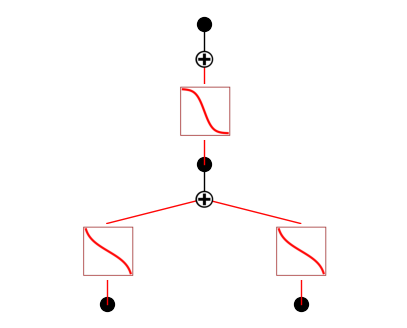

In [24]:
model.plot()

In [25]:
formula = model.symbolic_formula()[0][0]
nsimplify(ex_round(formula, 4))

tanh(atanh(x_1) + atanh(x_2))